# Computational Physics 2 - Project 5

This project deals with the applications of the Discrete Fourier Transform (DFT) and seperately, Green’s function for ODEs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.fft as fft
# from scipy.fft import fft, fftfreq (can be used to use functions directly)
import time as t

## 1 Discrete Fourier Transform

#### 1. Use the sound recorder of your laptop to record a short (maybe five seconds) wav file, say a single guitar string or singing a single note. Use pythons wavefile module to read in the wav file (5 pts).

A short close to $5s$ .wav file was recorded and saved as Recording.wav

In [3]:
# reading in the .wav file
samplerate, dataA = wavfile.read('Recording.wav')

#### 2. In two separate panels, plot the entire timeseries as well as a short section (say, .1 sec). Describe the functional form of the short section: is there a dominant frequency? (10 pts)

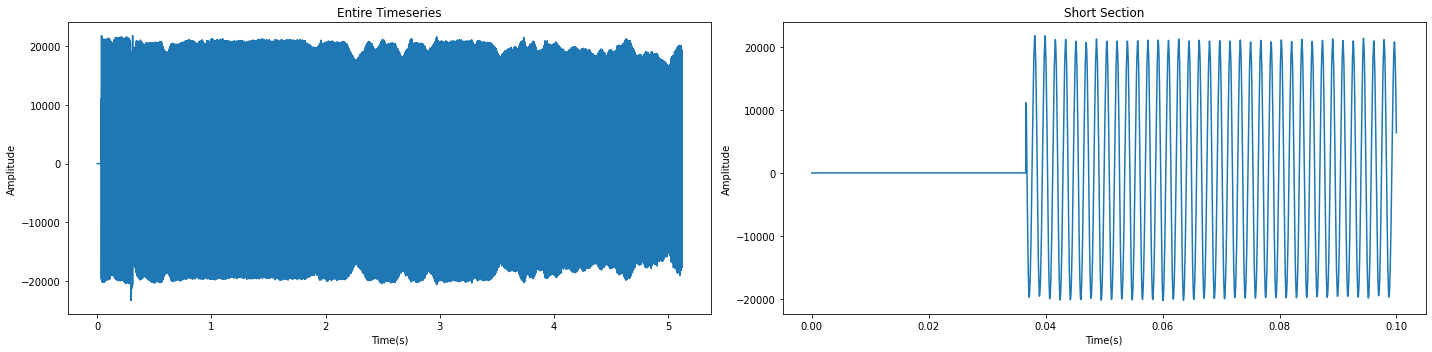

In [4]:
# generating time arrays to plot dataA against
def plot_data(samplerate, dataA):

    total_samples = len(dataA)
    short_section = int(0.1 * samplerate)

    time = np.linspace(0.0, (len(dataA)/samplerate), total_samples)

    short_time = time[:short_section]
    short_dataA = dataA[:short_section]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    axes[0].plot(time, dataA)
    axes[0].set_xlabel("Time(s)")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_title("Entire Timeseries")
    axes[1].plot(short_time, short_dataA)
    axes[1].set_xlabel("Time(s)")
    axes[1].set_ylabel("Amplitude")
    axes[1].set_title("Short Section")
    fig.tight_layout()

plot_data(samplerate, dataA)

Yes, there is a dominant frequency.

#### 3. implement a discrete Fourier transform hint: for some speedup, store all $W^k_N$ for k $\in$ {0, . . . , N − 1} in an N-element array and re-use these values. (5 pts)

In [5]:
# implementation of a discrete Fourier transform
def DFT(x):
    
    # getting the length of the input vector
    N = len(x)

    # computing fourier coefficients
    f_hat = np.array([np.sum(x * np.exp(-2j * np.pi * k * np.arange(N)/N)) for k in range(N)])
    
    return f_hat


# # an alternate (but slower) DFT
# def DFT(x):
    
#     # getting the length of the input vector
#     N = len(x)

#     # computing the W_N^k's to re-use values
#     w_n_k = np.array([(np.exp(-2j*np.pi/N))**k for k in range(N)])

#     # computing fourier coefficients
#     f_hat = np.array([np.dot((w_n_k**i),x) for i in range(N)])

#     return f_hat 

#### 4. import python’s implementation of the Fast Fourier Transform and obtain the power spectrum $S(\omega) = \tilde{f*}(\omega) \tilde{f}(\omega)$ for a section of your signal, plot it as a function of $\omega$ and discuss the findings. Does the spectrum match your intuition about the note you have recorded? Does your DFT give the same spectrum as the built-in FFT (apart from round-off errors)? On a linear vertical scale, is there a clear maximum frequency, i.e. a spike (apart from low-amplitude noise)? Note this frequency, $ω_{max}$, for later use. (15 pts)

48000


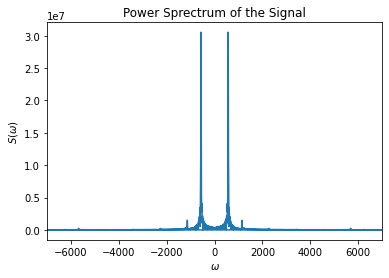

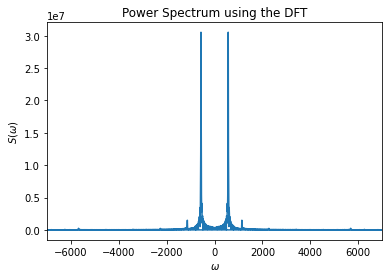

In [6]:
# hardcoding some variables to obtain transforms (to get data)
total_samples = len(dataA)
short_section = int(0.1 * samplerate)
time = np.linspace(0.0, (len(dataA)/samplerate), total_samples)
short_time = time[:short_section]
short_dataA = dataA[:short_section]

# obtaining the power spectrum of the signal for 0.1s section of signal
Y = fft.fft(short_dataA)
x = fft.fftfreq(len(short_dataA), 1/samplerate)
print(samplerate)

plt.plot(x, np.abs(Y))
plt.xlabel("$\omega$")
plt.ylabel("$S(\omega)$")
plt.title("Power Sprectrum of the Signal")
plt.xlim(-7000,7000)
plt.show()

# obtaining result using own implementation
Y_own = DFT(short_dataA)
plt.plot(x, np.abs(Y_own))
plt.xlabel("$\omega$")
plt.ylabel("$S(\omega)$")
plt.title("Power Spectrum using the DFT")
plt.xlim(-7000,7000)
plt.show()

The spectrum does indeed match our intuition about the note recorded since there is a single, high power frequency spike (two spikes considering negatives as well) as well as a bunch of other smaller frequencies with lesser power. Our implemented DFT gives almost the exact same result as the built-in FFT accounting for round-off errors as shown above. As mentioned before, there is a clear maximum fequency $\omega_{max}$. $\omega_{max}$ is seen to be around $575 rad/s$.

#### 5. use a timer to time both your version of the DFT and the python FFT. For sample sizes of $N = 10^a$ with a $\in$ {1, 5} perform both DFT and FFT and determine the scaling of computing time vs. N. (10 pts; Hint: Consider plotting on a log-log scale to extract the power-law exponent for DFT.)


In [7]:
def timer(dataA):

    N = len(dataA)

    sample_sizes = np.array([int(N/10**(5-i)) for i in range(1,6)])

    samples = np.array([dataA[:sample_sizes[j]] for j in range(5)], dtype=object)

    # performing DFT for all samples and recording time
    dft_times = np.zeros(5)
    for a in range(5):
        t1 = t.perf_counter()
        DFT(samples[a])
        t2 = t.perf_counter()
        dft_times[a] = t2-t1

    # performing FFT for all samples and recording time
    fft_times = np.zeros(5)
    for b in range(5):
        t1 = t.perf_counter()
        fft.fft(samples[b])
        t2 = t.perf_counter()
        fft_times[b] = t2-t1

    plt.loglog(sample_sizes, dft_times, label = "with DFT")
    plt.loglog(sample_sizes, fft_times, label = "with FFT")
    plt.legend()
    plt.xlabel("N")
    plt.ylabel("Computing Time")
    plt.title("Scaling of Computing Time vs. N on a log-log scale")
    plt.show()

    return sample_sizes, dft_times, fft_times

sample_sizes, dft_times, fft_times =  timer(dataA)

KeyboardInterrupt: 

**This computation takes almost 6 hours to run since the DFT implementation is extremely slow for like a 100000 samples.

In [ ]:
# computing the power-law exponent for the DFT and FFT

x_sizes = np.log10(sample_sizes)
y_dft = np.log10(dft_times)
y_fft = np.log10(fft_times)

slope_dft, intercept_dft = np.polyfit(x_sizes, y_dft, 1)
slope_fft, intercept_fft = np.polyfit(x_sizes, y_fft, 1)

print(f'Power Law Exponent for DFT : {slope_dft}')
print(f'Power Law Exponent for FFT : {slope_fft}')

Power Law Exponent for DFT : 1.820440709866721
Power Law Exponent for FFT : 0.12817426270428153


#### 6. FFT the entire timeseries. Now, FFT back to the time domain and verify that the timeseries is recovered. Remove a fraction $f_a = 1 - (1/2)^a, a \in {1,10}$ of your frequency data by setting the fraction $f_a$ of lowest-amplitude Fourier modes to zero (as measured by the power spectral density $S(\omega)$). From the remaining, non-zero amplitudes again back-transform to the time domain and plot the short .1 sec section of the resulting timeseries. How does this section look, qualitatively, as you remove more and more data (higher compression)? (15pts) Next, using $\textbf{wavefile.write(’filename\_out.wav’, samplerate, timeseries)}$, write a wave file for each $a$ (Note that the timeseries might have to be normalized/rescaled to avoid distortions). Listen to these files using your laptop and document your impressions: Which acoustic changes do you find with larger $a$? How is this impression reflected in the plot of the timeseries? (10 pts)

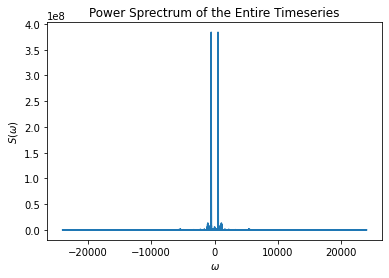

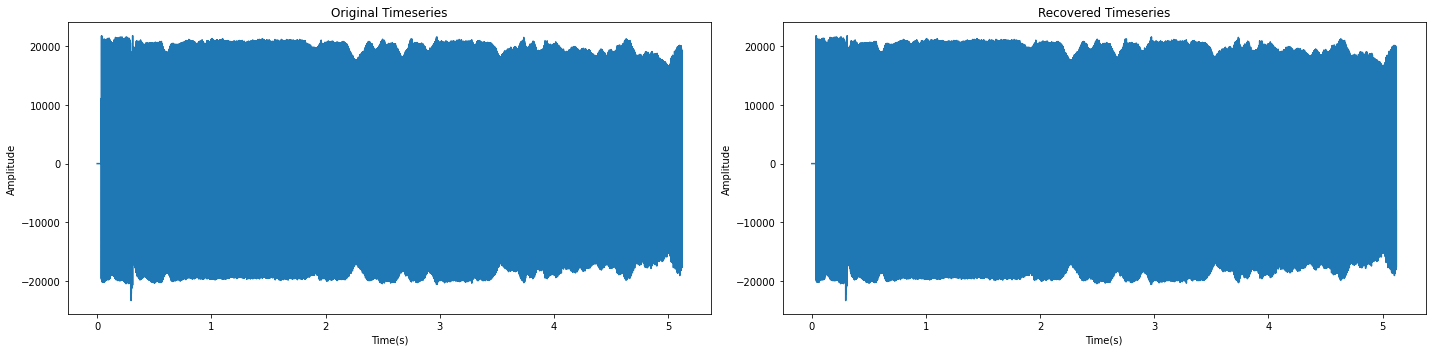

In [ ]:
# Doing an FFT on the entire timeseries
Y1 = fft.fft(dataA)
x1 = fft.fftfreq(len(dataA), 1/samplerate)

plt.plot(x1, np.abs(Y1))
plt.xlabel("$\omega$")
plt.ylabel("$S(\omega)$")
plt.title("Power Sprectrum of the Entire Timeseries")
plt.show()

# Doing an Inverse Fourier Transform to get back to the time domain
inv_tf = np.real(fft.ifft(Y1))

# plotting to verify
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes1[0].plot(time, dataA)
axes1[0].set_xlabel("Time(s)")
axes1[0].set_ylabel("Amplitude")
axes1[0].set_title("Original Timeseries")
axes1[1].plot(time, inv_tf)
axes1[1].set_xlabel("Time(s)")
axes1[1].set_ylabel("Amplitude")
axes1[1].set_title("Recovered Timeseries")
fig1.tight_layout()

As clearly seen, the timeseries was recovered successfully.

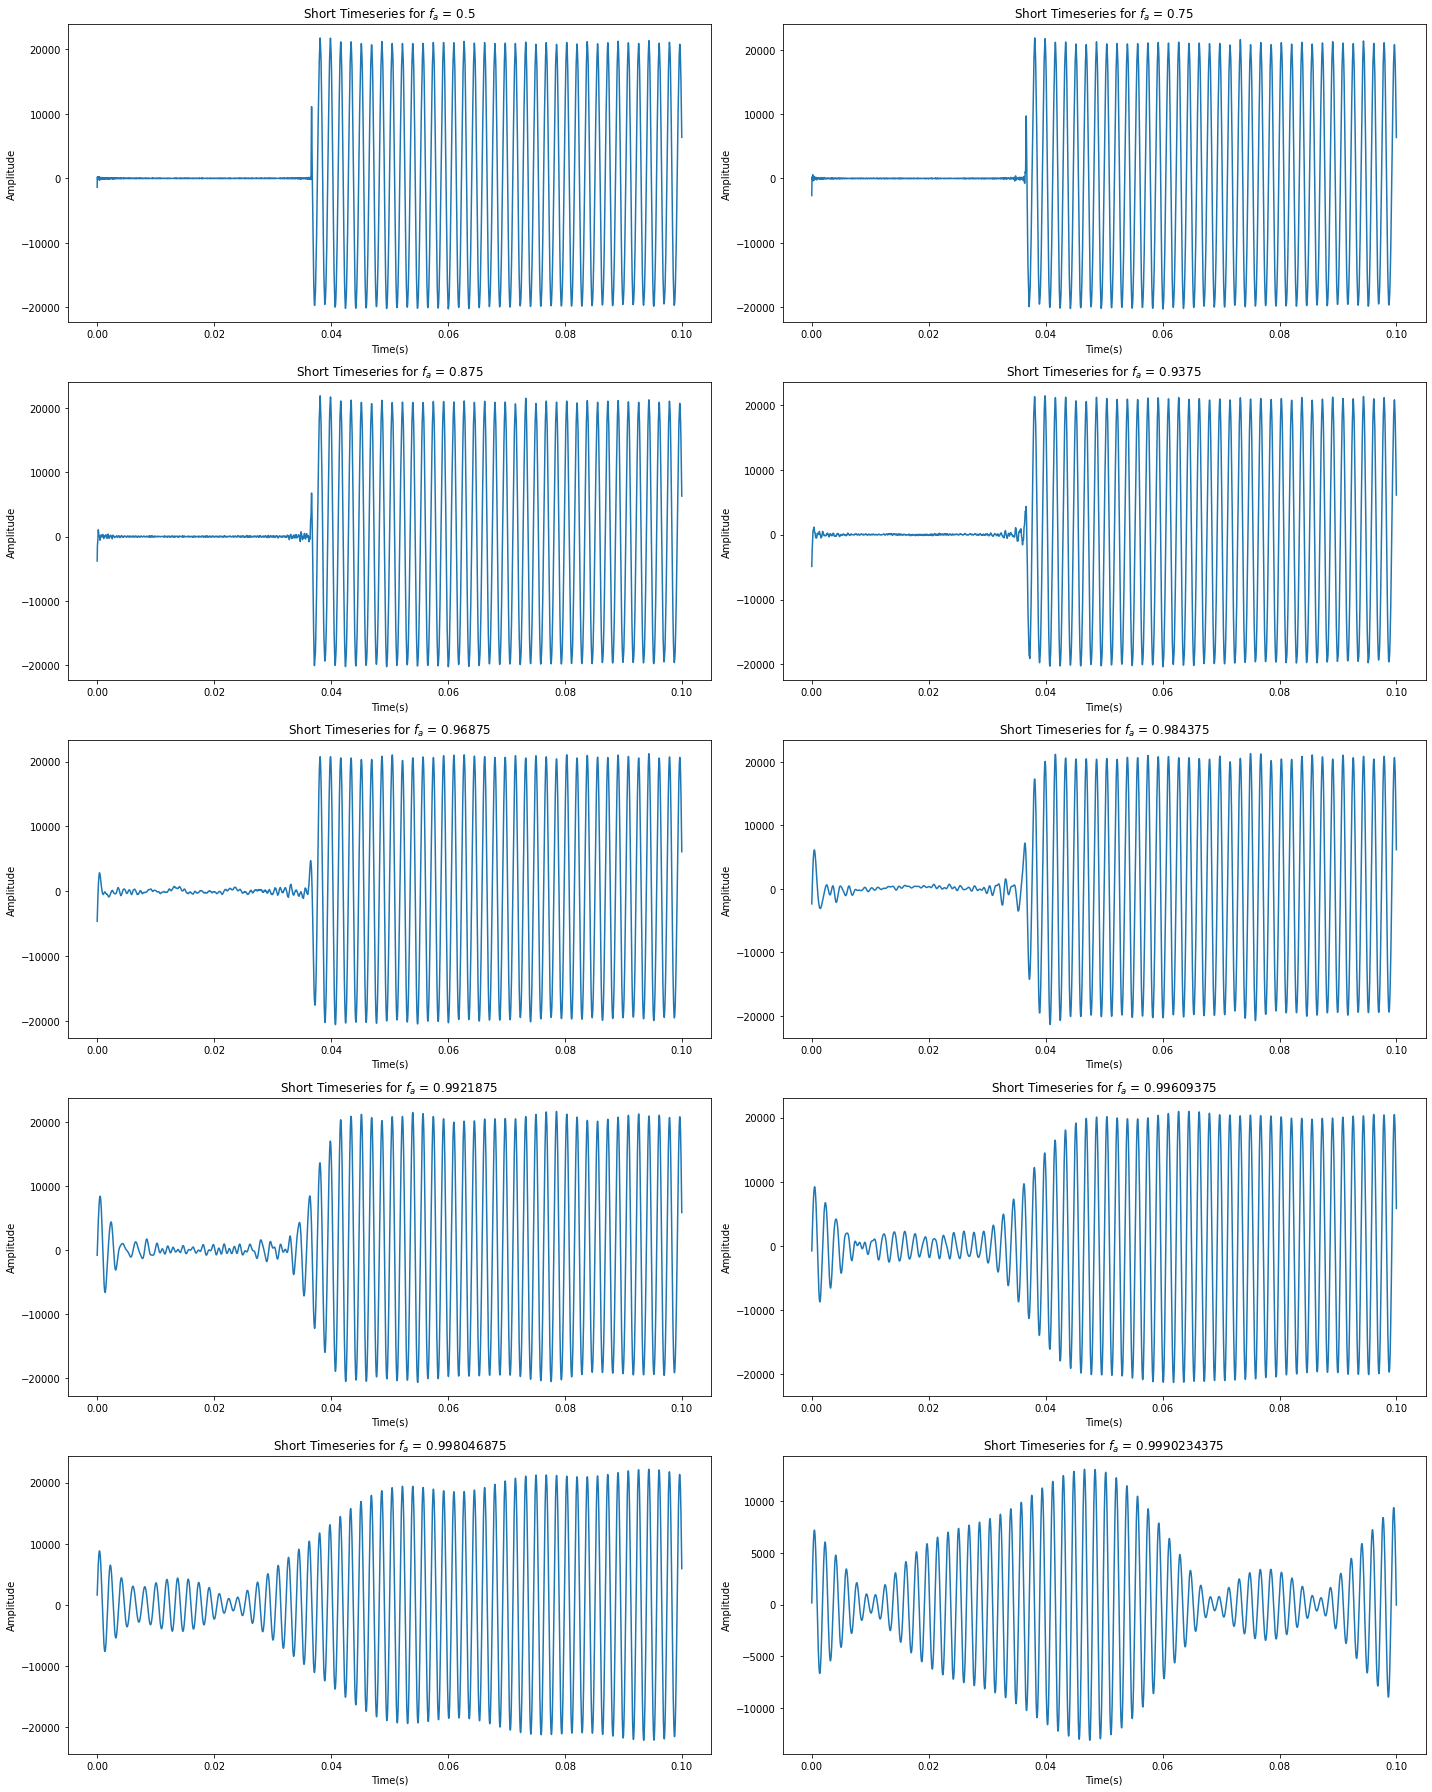

In [ ]:
# generating fa(no. of elements to remove using fraction fa)
fa = np.array([int((1 - 0.5**i)*len(Y1)) for i in range(1,11)])
# print(fa)

# function to remove fa elements of frequency data
def remove(complex_frequencies, f_a):
    frequencies = np.copy(complex_frequencies)
    amplitudes = abs(complex_frequencies)
    # computing indexes of lowest amplitudes of f_a elements
    idx = np.argpartition(amplitudes, f_a)
    # setting these elements with lowest amplitudes to 0
    frequencies[idx[:f_a]] = 0
    return frequencies

# generating frequencies with removed data
new_Y1 = np.array([remove(Y1, fa[j]) for j in range(10)])
# inverse fourier transforming to get back timeseries
INV_transform = np.array([np.real(fft.ifft(new_Y1[k])) for k in range(10)])

#plotting
fig2, axes2 = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes2 = axes2.flatten()
for v in range(10):
    axes2[v].plot(short_time, INV_transform[v][:len(short_time)])
    axes2[v].set_xlabel("Time(s)")
    axes2[v].set_ylabel("Amplitude")
    axes2[v].set_title(f'Short Timeseries for $f_a$ = {fa[v]/len(Y1)}')
fig2.tight_layout()

As more and more data is removed, as clearly observed above, the timeseries deviates more and more from the original timeseries (becomes distorted).

In [ ]:
# writing a .wav file for each a
for u in range(10):
    # 32767 is used to scale to fit int16
    normalize = np.int16(INV_transform[u] * -32767 / INV_transform[u].max())
    wavfile.write(f'Sound{u+1}.wav', samplerate, normalize)

With a larger $a$, the volume (amplitude) decreases as can be heard on the .wav files. This fact is also reflected on the timeseries as there are lesser components with lower amplitues and at $a = 10$, the amplitude has almost halved.

#### 7. Use only each 10th or 100th sample in your original timeseries to perform the FFT. From $\tilde{f}(\omega)$ obtained using each of these two smaller sample sizes, try to recover $f(t)$ by backtransforming. Plot the .1 sec section of your timeseries to compare the data for the different cases. Discuss your findings along the Shannon-Nyquist theorem. You may find the frequency $ω_{max}$, obtained higher up, useful. (15 pts)

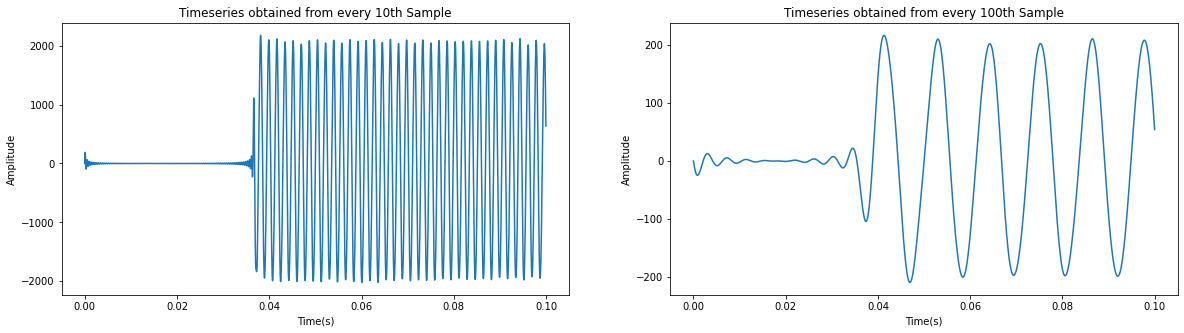

In [ ]:
# using only each 10th sample in original sample of timeseries
new_dataA_10 = np.array([dataA[l*10] for l in range(int(dataA.size/10))])

YF_10 = fft.fft(new_dataA_10)

# oversampling (zero padding in frequency domain)
l_new = len(Y1) - len(YF_10)
over_sampling = np.zeros(l_new)
new_YF_10 = np.concatenate([YF_10[:int(len(YF_10)/2)], over_sampling, YF_10[int(len(YF_10)/2):]])

inv_YF_10 = np.real(fft.ifft(new_YF_10))


# using only each 100th sample in original sample of timeseries
new_dataA_100 = np.array([dataA[p*100] for p in range(int(dataA.size/100))])

YF_100 = fft.fft(new_dataA_100)

# oversampling (zero padding in frequency domain)
l_new2 = len(Y1) - len(YF_100)
over_sampling2 = np.zeros(l_new2)
new_YF_100 = np.concatenate([YF_100[:int(len(YF_100)/2)], over_sampling2, YF_100[int(len(YF_100)/2):]])

inv_YF_100 = np.real(fft.ifft(new_YF_100))


# plotting
fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes3[0].plot(short_time, inv_YF_10[:len(short_time)])
axes3[0].set_xlabel("Time(s)")
axes3[0].set_ylabel("Amplitude")
axes3[0].set_title("Timeseries obtained from every 10th Sample")
axes3[1].plot(short_time, inv_YF_100[:len(short_time)])
axes3[1].set_xlabel("Time(s)")
axes3[1].set_ylabel("Amplitude")
axes3[1].set_title("Timeseries obtained from every 100th Sample")
fig1.tight_layout()

In [ ]:
print(f'Sample Rate of original signal : {samplerate} Hz')

Sample Rate of original signal : 48000 Hz


\begin{equation*}
    Nyquist Frequency \approx 2 * (2000 rad/s) / 2\pi = 636 Hz
\end{equation*}

For the initial signal, the sample rate is 48000 Hz. When we sample every 10th point, our sample rate becomes 4800 Hz. Since this value is still larger than the Nyquist frequency, the original signal can be reconstructed perfectly as seen above. However, when we sample every 100th point, our sample rate becomes 480 Hz which is lesser than the Nyquist frequency. Hence, as seen above, the original signal cannot be reconstructed perfectly and the amplitude is significantly decreased.

## 2. Green's function for ODEs

Consider the forced harmonic oscillator

\begin{equation*}
    \frac{d^2 y}{dt^2} + \beta \frac{dy}{dt} + \omega ^2 y = f(t)
\end{equation*}

where 

\begin{equation*}
    \frac{d^2 G(t;\tau)}{dt^2} + \beta \frac{dG(t;\tau)}{dt} + \omega ^2 G(t;\tau) = \delta (t - \tau)
\end{equation*}

defines the Green's function $G(t;\tau)$. Obtain the Green's function $\tilde{G}(\omega , \tau)$ by Fourier transform. (15 pts)

** For clarity, the constant $\omega^2$ will be written as $\gamma^2$ to prevent confusion with $\omega$ in Fourier space. This gives us the equation:
\begin{equation}
    \frac{d^2 G(t;\tau)}{dt^2} + \beta \frac{dG(t;\tau)}{dt} + \gamma ^2 G(t;\tau) = \delta (t - \tau)
\end{equation}


Fourier transforming equation (1) gives us:

\begin{equation*}
    (j \omega)^2 \tilde{G}(\omega ;\tau) + \beta j \omega \tilde{G}(\omega ;\tau) + \gamma^2 \tilde{G}(\omega ;\tau) = e^{-j \omega \tau}
\end{equation*}

Next, making $\tilde{G}(\omega ;\tau)$ the subject, we get:

\begin{equation*}
    \tilde{G}(\omega ;\tau) = \frac{e^{-j \omega \tau}}{(\gamma^2 - \omega^2) + j \beta \omega}
\end{equation*}